In [1]:
import seaborn as sns
import pandas as pd
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from mpl_toolkits import mplot3d
import cv2
import time

In [2]:
print(sns.__version__)

0.11.1


histograms in seaborn here: https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

In [3]:
save_location =  "../FLIR_Camera"
pdfCombined_figs_location  = "../FLIR_Camera/fastFlow_ShallowH_test1_centeredCame_flume_LookAngle_35Deg_PDFCOMBINED_FIGURES"

In [48]:
BEDFORMS = ['corals', 'canopy', 'rocks', 'dunes']
colors = {'corals':'dodgerblue','canopy':'green', 'rocks':'orange', 'dunes':'brown'}
bed_data = {}
for BEDFORM in ['dunes']: #  manually change this bedform everywhere
    data_filename = BEDFORM + "_fastFlow_ShallowH_test1.pickle"
    with open(os.path.join(save_location,data_filename), 'rb') as handle:
        all_data_dict_loaded = pickle.load(handle)
    bed_data[BEDFORM] = all_data_dict_loaded

## Plot Power Spectral Density of slopes x,y time averaged

In [49]:
for BEDFORM in ['dunes']:    
    
    s_hat_x = np.fft.fft2(bed_data[BEDFORM]['all_sx_maps'], axes = ([0,1]))
    s_hat_x = np.fft.fftshift(s_hat_x)
    s_hat_x_mag = (np.log(np.abs(s_hat_x)))**2

    s_hat_y = np.fft.fft2(bed_data[BEDFORM]['all_sy_maps'], axes = ([0,1]))
    s_hat_y = np.fft.fftshift(s_hat_y) # DC content at the center
    s_hat_y_mag = (np.log(np.abs(s_hat_y)))**2
    
FreqCompRows = np.fft.fftfreq(s_hat_x.shape[0],d=1)
FreqCompCols = np.fft.fftfreq(s_hat_x.shape[1],d=1)
FreqCompRows = np.fft.fftshift(FreqCompRows)
FreqCompCols = np.fft.fftshift(FreqCompCols)

R,C = np.meshgrid(FreqCompRows, FreqCompCols)

In [50]:
s_hat_x.shape

(1024, 1224, 73)

In [51]:
s_hat_x_mag_mean = np.mean(s_hat_x_mag, axis = (2))
s_hat_y_mag_mean = np.mean(s_hat_y_mag, axis = (2))

In [52]:
M,N = s_hat_x_mag_mean.shape

<Figure size 432x288 with 0 Axes>

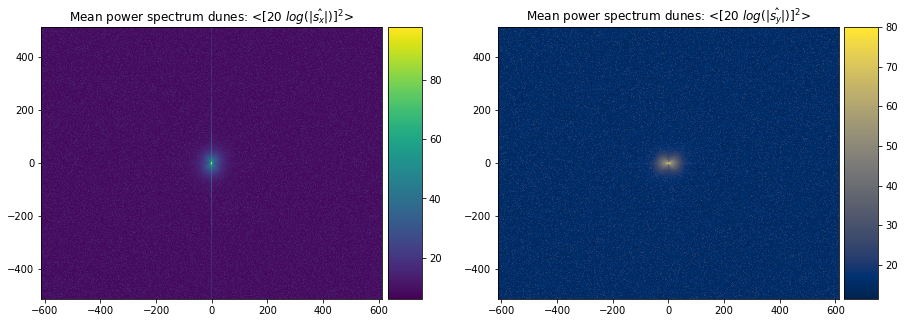

In [53]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(1,2, figsize =(15, 5)) 

ax0.set_title("Mean power spectrum dunes: $\less [log(|\\hat{s_x}|)]^2 \greater$", fontsize=  12)
im0 = ax0.imshow(s_hat_x_mag_mean, cmap = plt.cm.viridis, aspect='auto'\
                ,extent=(-N // 2, N // 2, -M // 2, M // 2))#, vmin = 0, vmax = 255)
divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="10%", pad=0.08)
cbar0 = plt.colorbar(im0, cax=cax0)


ax1.set_title("Mean power spectrum dunes: $\less [log(|\\hat{s_y}|)]^2 \greater$", fontsize=  12)
im1 = ax1.imshow(s_hat_y_mag_mean, cmap = plt.cm.cividis, aspect='auto'\
                , extent=(-N // 2, N // 2, -M // 2, M // 2)) # vmin = -5, vmax = 5, 
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.08)
cbar1 = plt.colorbar(im1, cax=cax1)

plt.show()

<Figure size 432x288 with 0 Axes>

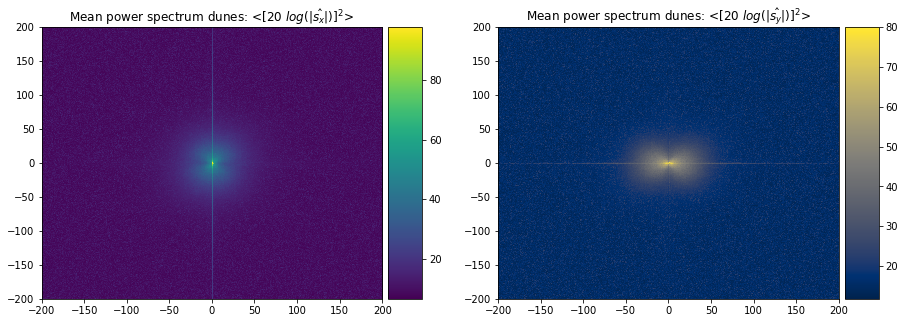

In [54]:
lim = 400
plt.figure()
fig, (ax0, ax1) = plt.subplots(1,2, figsize =(15, 5)) 

ax0.set_title("Mean power spectrum dunes: $\less [log(|\\hat{s_x}|)]^2 \greater$", fontsize=  12)
im0 = ax0.imshow(s_hat_x_mag_mean[M//2 - lim//2:M//2 + lim//2, N//2 - lim//2:N//2 + lim//2] , cmap = plt.cm.viridis, aspect='auto'\
                ,extent=(-lim// 2, lim// 2, -lim // 2, lim // 2))#, vmin = 0, vmax = 255)
divider0 = make_axes_locatable(ax0)
cax0 = divider0.append_axes("right", size="10%", pad=0.08)
cbar0 = plt.colorbar(im0, cax=cax0)


ax1.set_title("Mean power spectrum dunes: $\less [log(|\\hat{s_y}|)]^2 \greater$", fontsize=  12)
im1 = ax1.imshow(s_hat_y_mag_mean[M//2 - lim//2:M//2 + lim//2, N//2 - lim//2:N//2 + lim//2], cmap = plt.cm.cividis, aspect='auto'\
                , extent=(-lim// 2, lim// 2, -lim // 2, lim // 2)) # vmin = -5, vmax = 5, 
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.08)
cbar1 = plt.colorbar(im1, cax=cax1)

plt.show()